In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("CarPrice_Assignment.csv")  
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.drop(columns=['car_ID'], inplace=True)

In [27]:
categorical_cols = [
    'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
    'carbody', 'drivewheel', 'enginelocation', 'enginetype',
    'cylindernumber', 'fuelsystem'
]

numerical_cols = [
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]

In [28]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [29]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [30]:
X = (X - X.mean()) / X.std()

In [31]:
X = np.c_[np.ones(X.shape[0]), X]
y = y.values.reshape(-1, 1)

In [32]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [33]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [34]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta = theta - alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [35]:
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 2000

theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

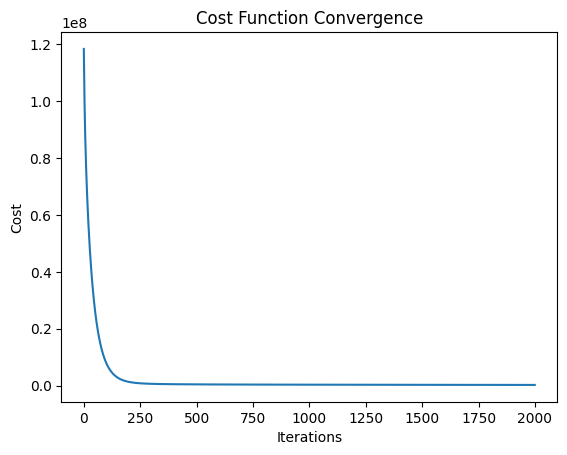

In [36]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [37]:
y_pred = X_test.dot(theta)

In [38]:
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 12236.550873392942


In [39]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 13437.329391450114


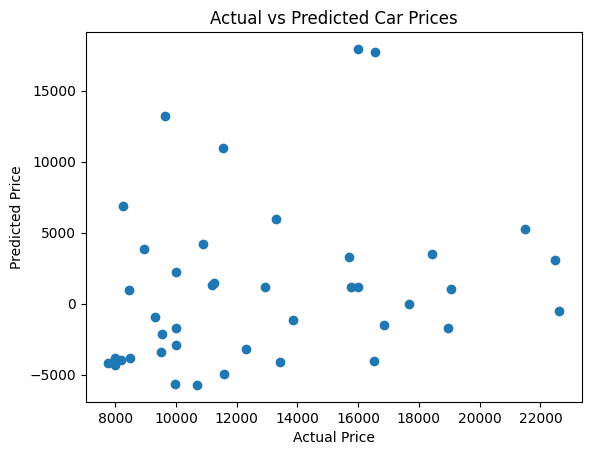

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()